# **Proyecto 2. Entrega 1, Modelos de Regresión Lineal**

## **INTEGRANTES:**

Jorge Luis Lopez 221038,
Andy Fuentes 22944,
Sergio Orellana 221122,
Christian Echeverria 221241 y
Davis Roldan 22672

## **Introducción:**

En esta primera entrega se realiza el análisis exploratorio de un dataset inmobiliario proveniente de la competencia de Kaggle "House Prices: Advanced Regression Techniques". El objetivo es comprender el comportamiento de los datos y preparar el conjunto para construir modelos de regresión lineal que permitan predecir el precio de las viviendas.

## **Análisis del dataset**

### **Análisis de las variables**

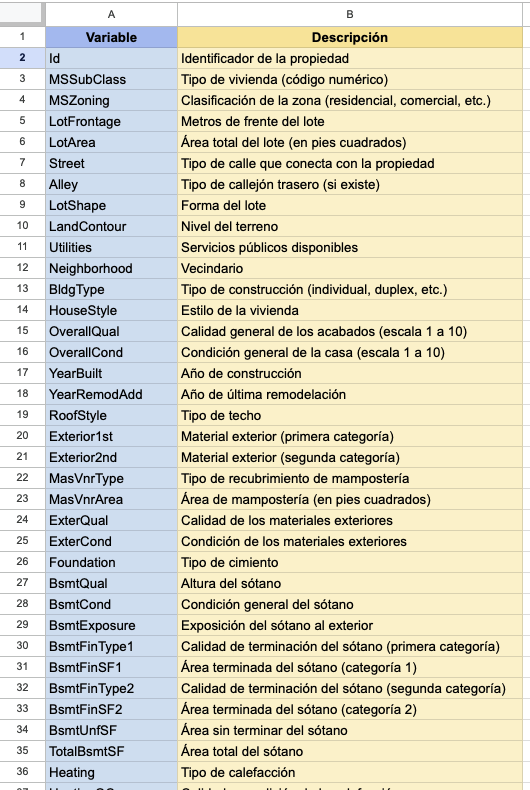

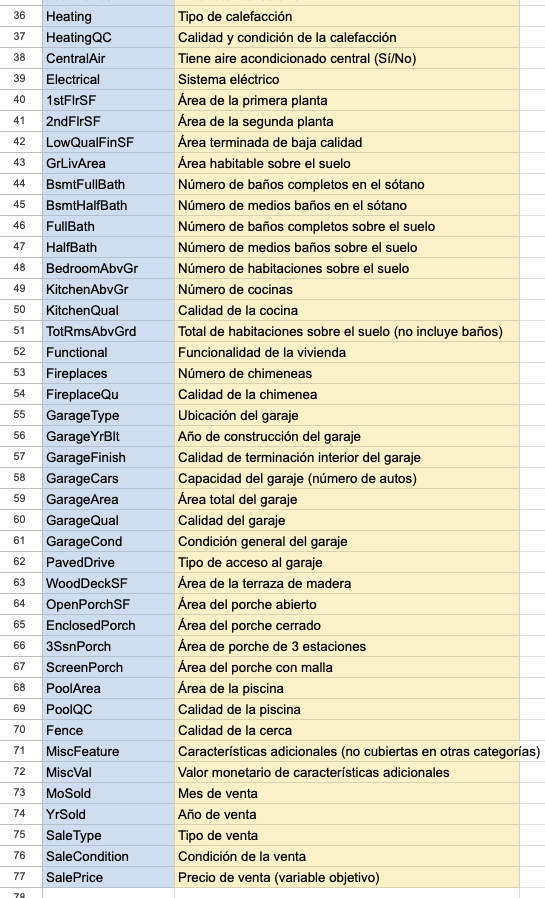


In [15]:
# Importando las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [16]:
# Cargando el dataset

df = pd.read_csv("train.csv")

In [17]:
# Mostrando las primeras 5 filas del dataset para tener una idea de los datos

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **Análisis Exploratorio**


In [18]:
# Mostrando la informacion del dataset para saber el tipo de datos y si hay valores nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **Revisión inicial de datos**

- El dataset tiene 1460 registros y 81 columnas.
- Hay una mezcla de variables numéricas, categóricas y algunas con valores nulos.
- Variables como `PoolQC`, `MiscFeature` y `Alley` tienen un alto porcentaje de valores faltantes.
- Las columnas categóricas representan atributos como el vecindario, tipo de calle, y materiales de construcción.


In [19]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### **Análisis descriptivo**

- Las variables numéricas como `LotArea`, `GrLivArea` y `SalePrice` tienen distribuciones bastante amplias, lo cual indica que hay mucha variabilidad en el tamaño de las propiedades y su precio.
- `SalePrice` tiene un máximo de 755,000 y un mínimo de 34,900.
- Hay variables como `PoolArea` que en la mayoría de los casos son cero, lo que implica que tener piscina es poco común.


In [20]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

### **Análisis de valores nulos**

- Hay varias columnas con más del 50% de sus valores nulos, como `PoolQC`, `MiscFeature` y `Alley`.
- Estas variables son candidatas para ser eliminadas, ya que tienen muy poca información útil.
- En variables importantes como `MasVnrArea` o `GarageYrBlt` hay algunos nulos que deben ser tratados (rellenados o eliminados).


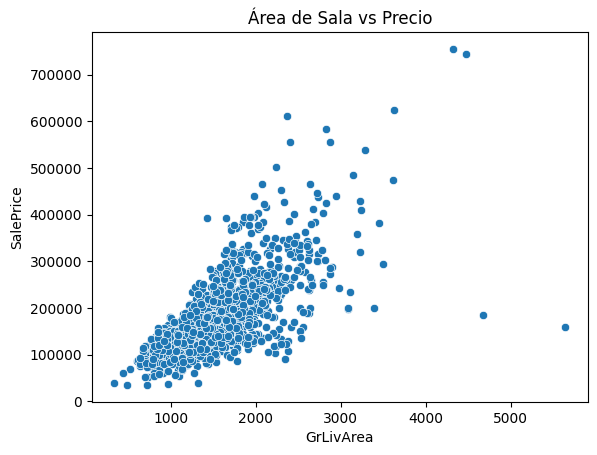

In [21]:
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("Área de Sala vs Precio")
plt.show()

### **Relación entre área habitable y precio (`GrLivArea` vs `SalePrice`)**

- Existe una relación positiva: a mayor área habitable, mayor precio.
- Sin embargo, se observan algunos **outliers** (casas muy grandes y precios muy bajos), que podrían afectar el modelo.
- Se recomienda revisar y posiblemente eliminar esos outliers.


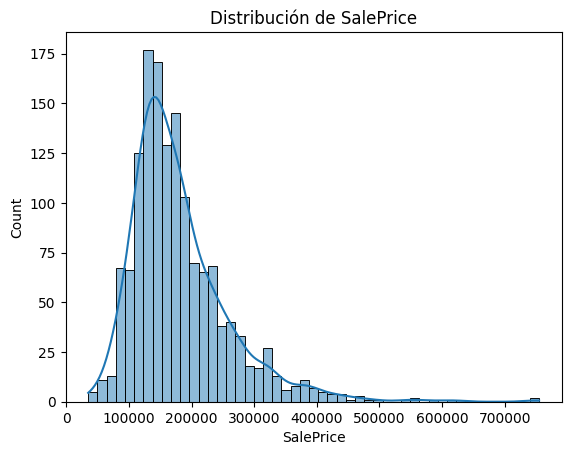

In [22]:
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribución de SalePrice")
plt.show()

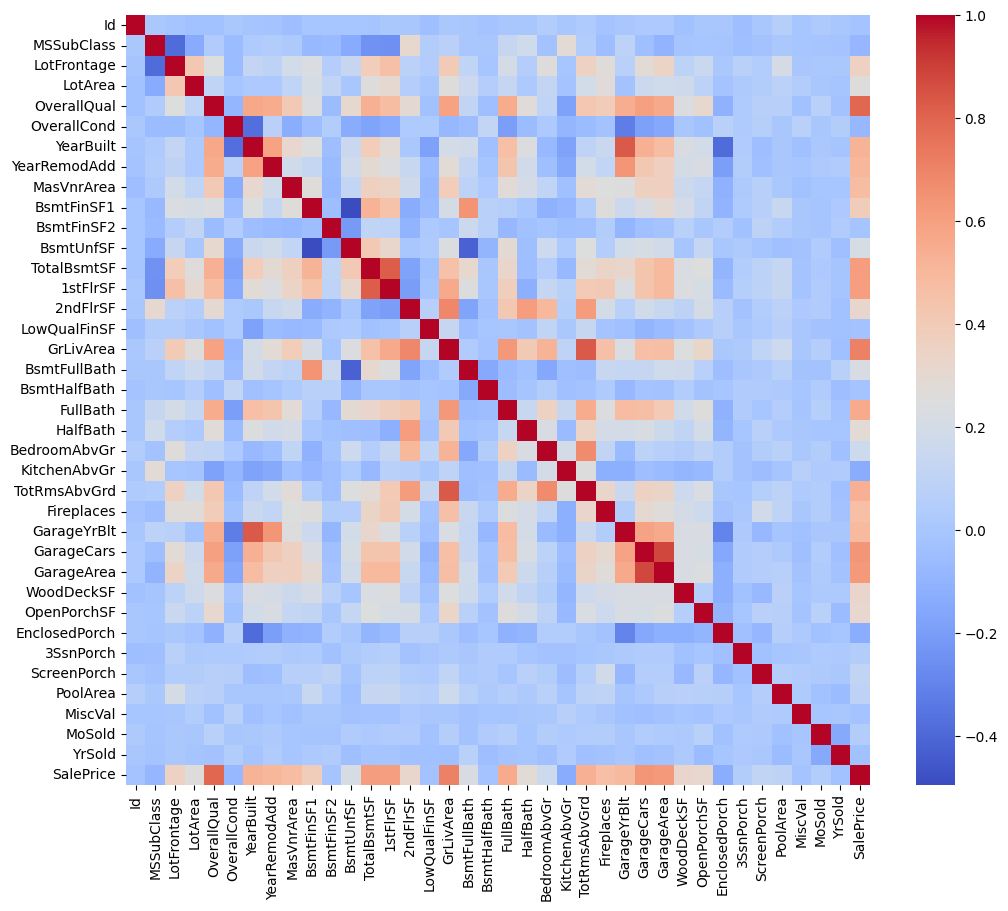

In [23]:
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=["int64", "float64"])

# Calcular la matriz de correlación de estas columnas numéricas
corr_matrix = df_numeric.corr()

# Visualizar el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

### **Matriz de correlación**

- `OverallQual`, `GrLivArea` y `GarageCars` son las variables más correlacionadas con el precio (`SalePrice`).
- Variables como `PoolArea`, `MiscVal` y `3SsnPorch` tienen correlación cercana a cero, lo que indica que no son relevantes para predecir el precio.
- Este análisis es clave para la selección de variables del modelo.


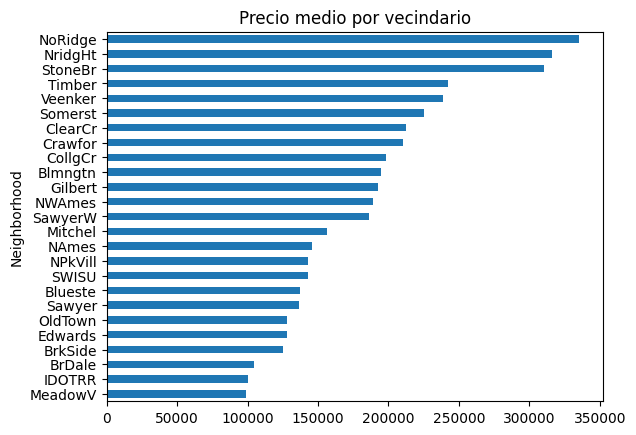

In [24]:
df.groupby("Neighborhood")["SalePrice"].mean().sort_values().plot(kind="barh")
plt.title("Precio medio por vecindario")
plt.show()

### **Precio promedio por vecindario**

- Hay una clara diferencia de precios según la ubicación.
- Vecindarios como `NoRidge` y `StoneBr` tienen precios significativamente altos, mientras que `MeadowV` es uno de los más económicos.
- Esto confirma que `Neighborhood` es una variable clave para el modelo.
- En el preprocesamiento se debe convertir `Neighborhood` en variables dummy.


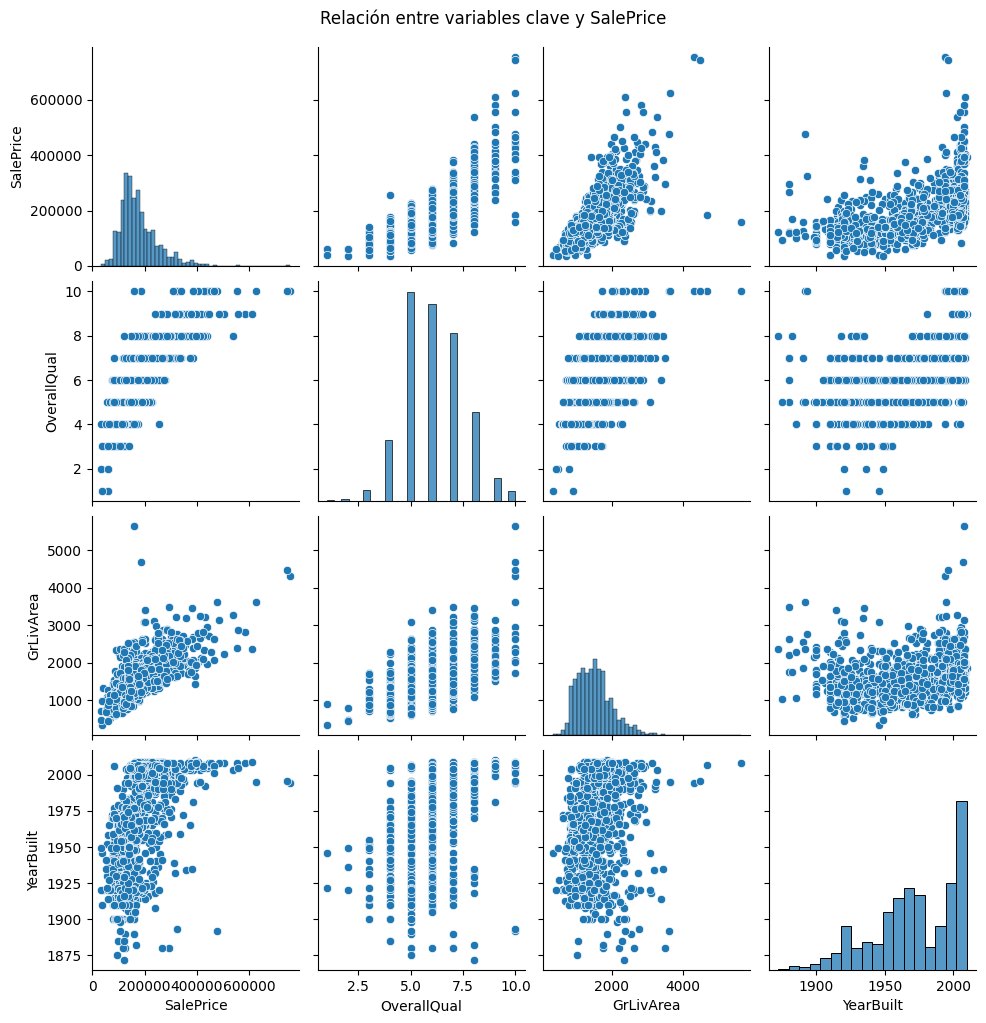

In [25]:
sns.pairplot(df, vars=["SalePrice", "OverallQual", "GrLivArea", "YearBuilt"])
plt.suptitle("Relación entre variables clave y SalePrice", y=1.02)
plt.show()

### **Pairplot: Relación entre variables clave y SalePrice**

Existe una relación clara y positiva entre OverallQual y SalePrice. A mayor calidad general de la casa, mayor es el precio.
Lo mismo ocurre con GrLivArea (área habitable). Casas más grandes tienden a tener precios más altos.
En YearBuilt, se observa que las casas más nuevas tienden a ser más caras.
Hay algunos outliers (puntos alejados de la tendencia general), principalmente casas muy grandes con precios inusualmente bajos.


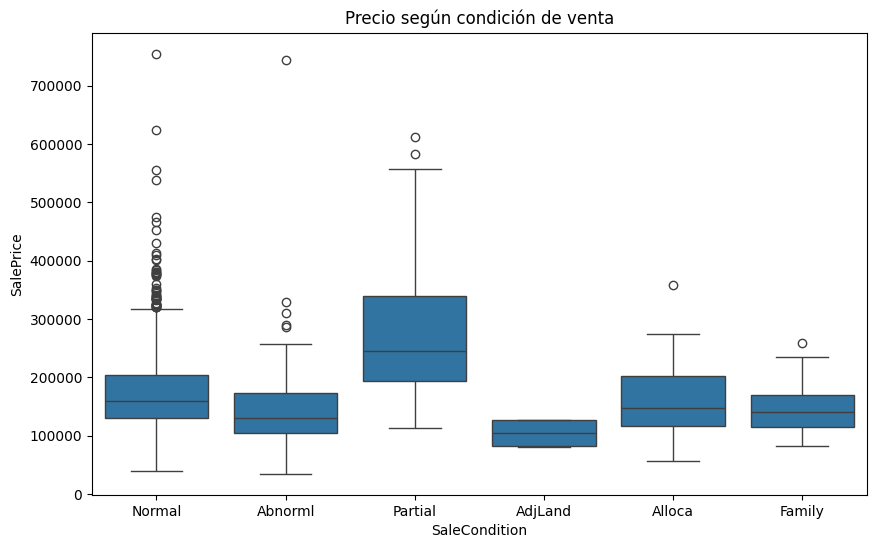

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="SaleCondition", y="SalePrice", data=df)
plt.title("Precio según condición de venta")
plt.show()

### **Boxplot: Precio según condición de venta**

1. Las casas vendidas bajo la condición Normal tienen una distribución de precios más estable.
2. Las casas con condición de venta Partial tienden a tener precios más altos, posiblemente porque son casas nuevas o remodeladas.
3. En Abnorml, se observan precios generalmente más bajos, lo cual es lógico porque puede referirse a ventas forzadas o condiciones especiales.
4. Existen varios outliers en cada categoría, especialmente en Normal y Partial.


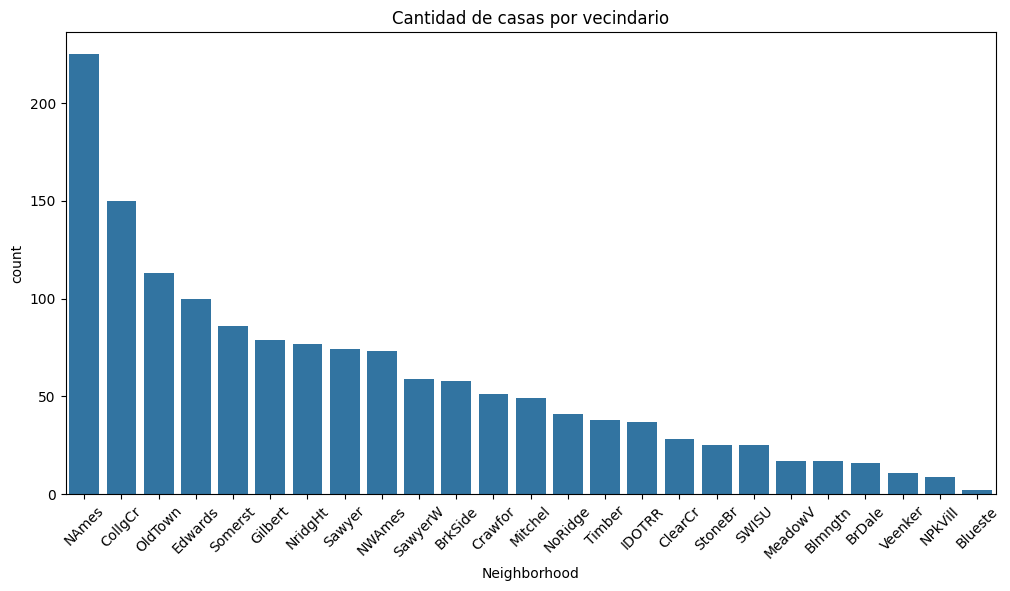

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Neighborhood", data=df, order=df["Neighborhood"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Cantidad de casas por vecindario")
plt.show()

### **Countplot: Cantidad de casas por vecindario**

1. NAmes es el vecindario con más casas en el dataset, seguido por CollgCr y OldTown.
2. Vecindarios como MeadowV y Blueste tienen muy pocas casas registradas.
3. Esto indica que algunos vecindarios aportan mucha más información al modelo que otros, por lo que en el preprocesamiento se debe considerar si los vecindarios con muy pocas casas son relevantes o no.


## **Conclusiones Finales - Primera Entrega ( Avances )**

En este primer avance se realizó un análisis exploratorio completo sobre el dataset inmobiliario proporcionado por Kaggle, logrando obtener hallazgos clave que serán fundamentales para el desarrollo del modelo de regresión lineal. A continuación, se resumen las conclusiones más relevantes:

1. El dataset cuenta con 1460 registros y 81 columnas, lo cual proporciona una base de datos rica en información. Sin embargo, se identificaron varias variables con un alto porcentaje de valores nulos, como PoolQC, MiscFeature y Alley, que deberán ser evaluadas para decidir si se eliminan o se imputan.

2. El precio de las viviendas (SalePrice) presenta una distribución sesgada positivamente, con una larga cola hacia precios altos. Esto sugiere que en el preprocesamiento puede ser necesario aplicar una transformación logarítmica para mejorar la linealidad.

3. Las variables OverallQual, GrLivArea y GarageCars mostraron ser las más correlacionadas con el precio de las viviendas. Esto indica que la calidad de construcción, el tamaño habitable y la capacidad del garaje son factores clave al momento de estimar el precio.

4. En el análisis por vecindario, se observó que hay zonas con precios significativamente más altos, como NoRidge y StoneBr, mientras que otras como MeadowV presentan precios considerablemente más bajos. Esto confirma que la ubicación geográfica es una variable relevante para el modelo.

5. Al revisar la condición de venta (SaleCondition), se identificó que las ventas normales (Normal) son las más frecuentes y presentan una amplia dispersión de precios. Por otro lado, las ventas parciales (Partial), que podrían representar ventas de casas nuevas o remodeladas, tienden a tener precios más elevados.

6. El análisis visual también permitió detectar la presencia de varios outliers, principalmente casas con áreas habitables extremadamente grandes y precios sorprendentemente bajos. Estos puntos atípicos deberán ser tratados cuidadosamente para no distorsionar el modelo de regresión.

7. Finalmente, se concluye que el dataset contiene una mezcla de variables numéricas y categóricas, por lo que será indispensable aplicar un buen preprocesamiento, que incluya imputación de nulos, transformación de variables y codificación de categorías, previo al entrenamiento del modelo.


## **División del dataset**


In [ ]:
# Revisar valores nulos por columna
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
# Se volvió a realizar para tener el contexto de los valores nulos

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Sabiendo y determinando cuales son las columnas afectadas con datos nulos, como anteriormente también se vio en el análisis exploratorio, empezamos a hacer algo con estos nulos, según nuestros criterios los cuales son:


In [ ]:
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_23144\4219873873.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
C:\Users\sergi\AppData\Local\Temp\ipykernel_23144\4219873873.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

### **¿Por qué se la mediana?**

Para columnas como LotFrontage y MasVnrArea (variables numéricas), yo elijo imputar los valores faltantes con la mediana. Ya que, la mediana es robusta ante outliers, lo que significa que no se ve afectada por valores extremos, permitiéndome mantener una buena representación de la distribución de los datos.


In [ ]:
df["Alley"].fillna("NoAcceso", inplace=True)
df["PoolQC"].fillna("NoPool", inplace=True)
df["Fence"].fillna("NoFence", inplace=True)
df["MiscFeature"].fillna("None", inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_23144\207476612.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alley'].fillna('NoAcceso', inplace=True)
C:\Users\sergi\AppData\Local\Temp\ipykernel_23144\207476612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

### **¿Por qué se utilizó la asignación de esta característica?**

En variables como Alley, PoolQC, Fence y MiscFeature, la ausencia de dato a menudo indica que la casa no tiene esa característica. Yo asigno etiquetas como 'NoAcceso', 'NoPool', 'NoFence' o 'None' para representar explícitamente que la información no aplica, en lugar de dejar un valor nulo que pueda generar confusión en el análisis.


In [ ]:
bsmt_cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in bsmt_cols:
    df[col].fillna("NoBsmt", inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_23144\2667349312.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('NoBsmt', inplace=True)


### **¿Por qué se indicó que no existe un sótano?**

Muchas veces, la falta de información en las columnas relacionadas con el sótano indica que la casa no tiene sótano. Yo itero sobre cada columna y relleno los valores nulos con la etiqueta 'NoBsmt', lo que me permite tratar estas ausencias de forma consistente y clara en mi análisis.


In [ ]:
garage_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for col in garage_cols:
    df[col].fillna("NoGarage", inplace=True)
df["GarageYrBlt"].fillna(0, inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_23144\1807173779.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('NoGarage', inplace=True)
C:\Users\sergi\AppData\Local\Temp\ipykernel_23144\1807173779.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

### **¿Por qué se realizó la asignación de estos valores?**

Al igual que con el sótano, la ausencia de datos en columnas relacionadas con el garaje suele indicar que la casa no cuenta con uno. Yo asigno la etiqueta 'NoGarage' para las variables categóricas y, en el caso de GarageYrBlt (una variable numérica que indica el año de construcción del garaje), asigno un valor de 0 para señalar la ausencia. Esto ayuda a que mi modelo pueda interpretar correctamente estas ausencias sin que se pierda la información.


In [ ]:
df["MasVnrType"].fillna("None", inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_23144\3278325972.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrType'].fillna('None', inplace=True)


### **¿Por qué se llenaron los valores de mampostería de esta forma?**

Yo decido rellenar los valores nulos con la etiqueta 'None', ya que así reflejo que la casa no posee ningún tipo de revestimiento de mampostería. Esto permite que mi modelo reconozca esta ausencia de información como una característica significativa en lugar de tratarla como datos perdidos.


In [ ]:
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_23144\1931642042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)


### **¿Por qué se usó la moda?**

Dado que solo hay un valor faltante, yo opto por imputarlo con la moda (el valor que más se repite) de esta columna. Esta estrategia es adecuada para variables categóricas y minimiza el impacto de la imputación, ya que se utiliza el valor que es más representativo en el conjunto de datos y no afecta en el resultado.


In [ ]:
df["FireplaceQu"].fillna("NoFireplace", inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_23144\1638833647.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('NoFireplace', inplace=True)


### **¿Por qué se utilizó esta inserción de None?**

Yo opto por rellenar estos valores nulos con la etiqueta 'NoFireplace', lo que clarifica de manera explícita que no hay chimenea en la vivienda. Donde, esto le permite a mi análisis y modelo diferenciar entre casas con un sistema de chimeneas y aquellas sin él.


## Verificación de los valores nulos


In [39]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


Después de aplicar las imputaciones, yo vuelvo a contar los valores nulos para asegurarme de que el proceso fue exitoso y que ya no quedan columnas con valores faltantes. Esto es importante para garantizar que mi dataset está limpio antes de proceder a la división en conjuntos de entrenamiento y prueba.
